# Applications

In [1]:
#if CV is not already installed, uncomment this and run this block of code
#import sys
#!{sys.executable} -m pip install opencv-python

In [ ]:
#pip install opencv-python

In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
#from cv import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [3]:
#pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 825.8 kB/s eta 0:00:47
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.2/38.8 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.4/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.4/38.8 MB 1.9 MB/s eta 0:00:21
    --------------------------------------- 0.7/38.8 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.8 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.9/38.8 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.2/38.8 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.7/38.8 MB 3.5 MB/s eta 0:00:11
   - -----

In [37]:
pwd

'C:\\Users\\sumit\\Downloads'

In [6]:
## TODO: LOAD IMAGE
url = "https://cloudfront-us-east-2.images.arcpublishing.com/reuters/WZOGRHKGYJIM7BGC2SXBBEZ4NM.jpg"
url = "https://www.lavanguardia.com/files/og_thumbnail/uploads/2022/01/29/61f533e43523a.png"
url = "https://upload.wikimedia.org/wikipedia/commons/6/6a/Holi_Festival_of_Colors_Utah%2C_United_States_2013.jpg"
myImg = io.imread('roko1.png')
#myImg = io.imread(url)

In [7]:
myImg.shape

(1279, 1920, 3)

In [8]:
myImg

array([[[217, 228, 231],
        [217, 228, 231],
        [217, 228, 231],
        ...,
        [241, 247, 250],
        [241, 247, 250],
        [241, 247, 250]],

       [[217, 228, 231],
        [217, 228, 231],
        [217, 228, 231],
        ...,
        [241, 247, 250],
        [241, 247, 250],
        [241, 247, 250]],

       [[218, 229, 232],
        [218, 229, 232],
        [218, 229, 232],
        ...,
        [241, 247, 250],
        [241, 247, 250],
        [241, 247, 250]],

       ...,

       [[ 62,  87,  33],
        [ 65,  89,  35],
        [ 69,  94,  40],
        ...,
        [ 72, 102,  42],
        [ 72, 102,  42],
        [ 75, 106,  45]],

       [[ 62,  87,  33],
        [ 63,  88,  34],
        [ 67,  92,  38],
        ...,
        [ 78, 108,  48],
        [ 78, 108,  48],
        [ 83, 114,  53]],

       [[ 59,  83,  30],
        [ 60,  85,  31],
        [ 65,  89,  35],
        ...,
        [ 81, 111,  51],
        [ 81, 111,  51],
        [ 87, 117,  57]]

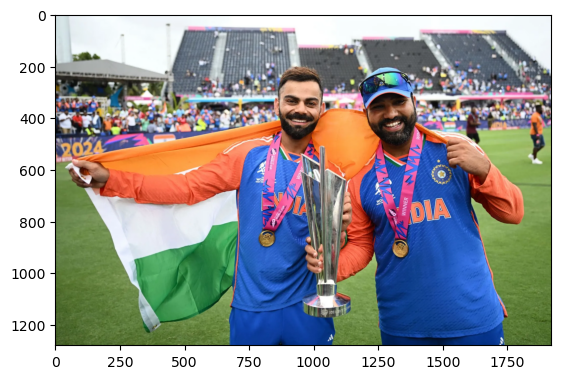

In [9]:
plt.imshow(myImg)

In [9]:
#myimgr = 255 - myImg
#plt.imshow(myimgr)

In [10]:
myImg.shape

(1279, 1920, 3)

In [11]:
myImgnew = myImg.reshape(myImg.shape[0]*myImg.shape[1],myImg.shape[2])
myImgnew.shape

(2455680, 3)

In [12]:
myImgnew

array([[217, 228, 231],
       [217, 228, 231],
       [217, 228, 231],
       ...,
       [ 81, 111,  51],
       [ 81, 111,  51],
       [ 87, 117,  57]], dtype=uint8)

In [13]:
uniquecolors = np.unique(np.array(myImgnew), axis=0)
uniquecolors.shape

(376021, 3)

In [16]:
#There are approx 2.29lakh unique colors

In [15]:
myImgnew

array([[217, 228, 231],
       [217, 228, 231],
       [217, 228, 231],
       ...,
       [ 81, 111,  51],
       [ 81, 111,  51],
       [ 87, 117,  57]], dtype=uint8)

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=100000,random_state = 5)
kmeans.fit(myImgnew)
labels = kmeans.predict(myImgnew)
#print(labels)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 10)
gmm.fit(myImgnew)
labels = kmeans.predict(myImgnew)
#print(labels)

In [19]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
kmeans.cluster_centers_

array([[ 33.54681963,  80.95954424, 171.22760939],
       [226.04141464, 226.15665331, 230.97515791],
       [112.71309862, 133.89899216,  97.49014921],
       [233.33326909, 126.15392372,  89.7484623 ],
       [ 60.30232283,  63.35131544,  52.24679956]])

In [18]:
Ccentres = kmeans.cluster_centers_.astype(int)
Ccentres

array([[ 33,  80, 171],
       [226, 226, 230],
       [112, 133,  97],
       [233, 126,  89],
       [ 60,  63,  52]])

In [19]:
Ccentres[0]

array([ 33,  80, 171])

In [20]:
newimage = []
for i in range(len(labels)):
    newimage.append(Ccentres[labels[i]])

In [21]:
newimage = np.array(newimage)

In [22]:
newimage

array([[226, 226, 230],
       [226, 226, 230],
       [226, 226, 230],
       ...,
       [ 60,  63,  52],
       [ 60,  63,  52],
       [112, 133,  97]])

In [23]:
newimagesee = newimage.reshape(myImg.shape[0],myImg.shape[1],myImg.shape[2])

In [24]:
newimagesee

array([[[226, 226, 230],
        [226, 226, 230],
        [226, 226, 230],
        ...,
        [226, 226, 230],
        [226, 226, 230],
        [226, 226, 230]],

       [[226, 226, 230],
        [226, 226, 230],
        [226, 226, 230],
        ...,
        [226, 226, 230],
        [226, 226, 230],
        [226, 226, 230]],

       [[226, 226, 230],
        [226, 226, 230],
        [226, 226, 230],
        ...,
        [226, 226, 230],
        [226, 226, 230],
        [226, 226, 230]],

       ...,

       [[ 60,  63,  52],
        [ 60,  63,  52],
        [ 60,  63,  52],
        ...,
        [ 60,  63,  52],
        [ 60,  63,  52],
        [ 60,  63,  52]],

       [[ 60,  63,  52],
        [ 60,  63,  52],
        [ 60,  63,  52],
        ...,
        [ 60,  63,  52],
        [ 60,  63,  52],
        [ 60,  63,  52]],

       [[ 60,  63,  52],
        [ 60,  63,  52],
        [ 60,  63,  52],
        ...,
        [ 60,  63,  52],
        [ 60,  63,  52],
        [112, 133,  97]]

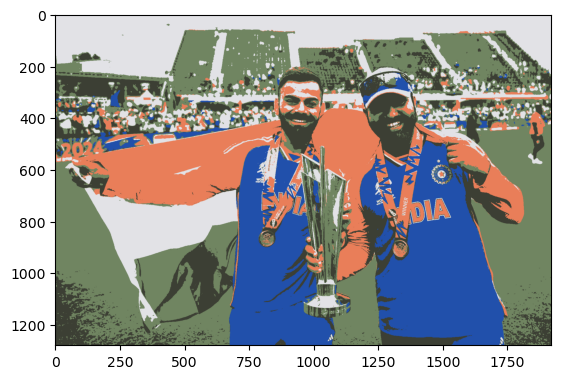

In [25]:
plt.imshow(newimagesee)

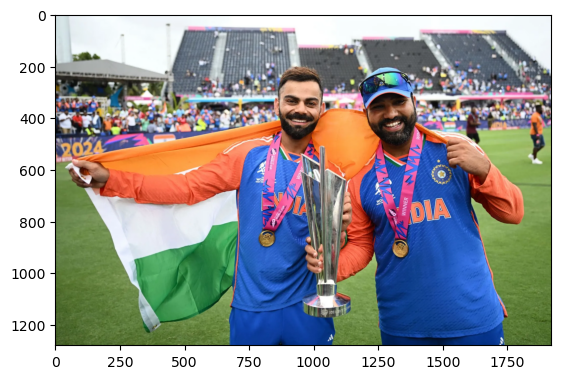

In [26]:
plt.imshow(myImg)

In [30]:
#?plt.imshow

In [31]:
result=cv.imwrite('31624.jpeg', newimagesee)



In [29]:
myImg.shape

(576, 1024, 3)

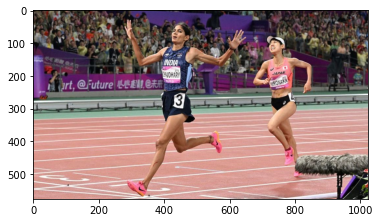

In [30]:
plt.imshow(myImg)

In [32]:
import numpy as np

In [35]:
10000*np.log(5)/np.log(10)

6989.700043360187